HW #2 complete 2/2 score on the thrid attempt

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

This is the version of the code where my initial conditions are determined / include x^2

In [211]:
tol = 1e-6

beta_start = 0                                # beta should start at 0 and increase or decrease by some db                                   # random db standard i guess
L = 4
xp = [-4,4]
YL1 = [0,0]                                         #setting up the initial condition matrix to be edited later
YL2 = [0,0]     #not used

xshoot = np.linspace(xp[0], xp[1], num = 81)

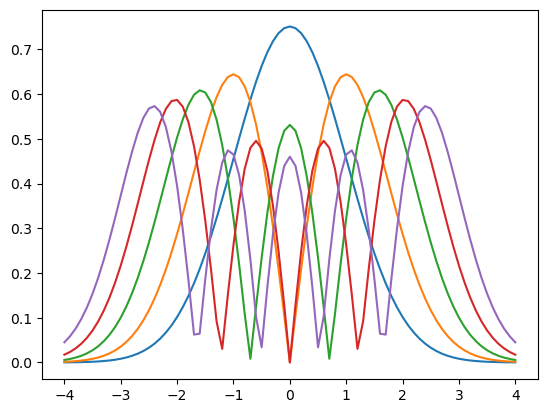

In [213]:
def shoot2(y, x, beta):                        # the definition of the converted first order df
    return [y[1], ((x**2) - beta)*y[0]]

betaarray = np.array([[]])
YL2Array = np.array([[]])
destinationArray = np.array([[]])
functionarray = np.array([[]])

for mode in range(1,6):
    beta = beta_start
    db = 1
    for j in range(100):
        #YL1[0] = np.exp(np.sqrt(beta)*xp[0])
        #YL1[1] = np.sqrt(beta)*YL1[0]  
        #YL1[0] = np.exp(np.sqrt((xp[0]**2) - beta)*xp[0])                 #not 100% sure if this is right
        #YL1[1] = np.sqrt((xp[0]**2) - beta)*YL1[0]                          #not 100% sure i this is right
        YL1[0] = 1
        YL1[1] = np.sqrt(L**2-beta)

        
        p = odeint(shoot2, YL1, xshoot, args=(beta,))
    
        
        #YL2 = np.sqrt(L**2-beta)        #debugging nonsense
        #print("j = ", j)
        #print("YL2 = ",  YL2)
        #print("enpoint = ",  p[-1,0])
        #print("beta = ", beta)

        
        if abs(p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) < tol:                  #cehcking convergence
            #print("j = ", j)
            #print("YL2 = ",  YL2)        #debugging
            #display(p[-1,0])
            betaarray = np.append(betaarray, [beta])
            YL2Array = np.append(YL2Array, [YL2])
            destinationArray = np.append(destinationArray, [p[-1,0]])
            #plt.plot(xshoot, p[:,0])     #debugging
            break
        if (-1) ** (mode+1) * (p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) > 0:       
            beta = beta + db
        else:
            beta = beta - db/2
            db = db / 2

        if j==99:
            print("j = ", j)
        

    beta_start = beta + .1                     # picking new beta
    norm = np.trapz(p[:,0] **2, xshoot)
    #print("norm = ",norm)   #normalization   
    tempfunction = np.abs(p[:,0] / np.sqrt(norm))  # the absolute value of the eigenfunctions 
    tempfunction = tempfunction.reshape(-1,1)
    plt.plot(xshoot, tempfunction)
    if mode == 1:
        functionarray = tempfunction
    else: 
        functionarray = np.hstack([functionarray, tempfunction])


#display(betaarray)                             #this is the eighevalues in a 1x5 vector so A2
A2 = betaarray
#display(A2)
#display(np.shape(A2))


#display(functionarray)                        #this is the eighenfunction A1
A1 = functionarray
#display(A1)
#display(np.shape(A1))

#display(YL2Array)
#display(destinationArray)
#plt.plot(xshoot,p[:,0])